# International Mathematical Olympiad (IMO) Data Analysis
#### Kavya Sikka (Student Number: 49130175)

This project involves the analysis of data related to the International Mathematical Olympiad (IMO). The dataset includes results from various countries, focusing on team compositions and individual performances. The analysis explores trends such as female representation in teams and the relationship between individual scores and the medals awarded. 

## Problem Statement:
The project aims to answer two key questions:

1. **Which countries have consistently shown the highest female representation in their IMO teams?**  
   - This analysis focuses on identifying countries that have maintained a significant percentage of female participants over the years.

2. **What medal can someone win based on total scores?**  
   - Using machine learning techniques like Random Forest, the goal is to predict the type of medal (Gold, Silver, Bronze, or Honourable Mention) based on a participant's total score.

The dataset is analyzed using PySpark for large-scale processing and visualized using Python's plotting libraries to draw meaningful insights from the data.


In [1]:
# load_data.py

from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("CSV Data Loader") \
    .getOrCreate()

# Specify HDFS URL with port
hdfs_country_path = 'hdfs://localhost:9000/user/kavyasikka1/data/country_results_df.csv'
hdfs_individual_path = 'hdfs://localhost:9000/user/kavyasikka1/data/individual_results_df.csv'

# Load the data from HDFS
country_data = spark.read.csv(hdfs_country_path, header=True, inferSchema=True)
individual_data = spark.read.csv(hdfs_individual_path, header=True, inferSchema=True)

# Show the first few rows of each DataFrame
print("Country Data:")
country_data.show()  # Display the first few rows of the country data

print("Individual Data:")
individual_data.show()  # Display the first few rows of the individual data

# Stop the Spark session when done
spark.stop()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/17 18:08:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Country Data:
+----+--------------------+-------------+--------------+----------------+---+---+---+---+---+---+---+-----------+-------------+-------------+-------------------------+--------------------+--------------------+
|year|             country|team_size_all|team_size_male|team_size_female| p1| p2| p3| p4| p5| p6| p7|awards_gold|awards_silver|awards_bronze|awards_honorable_mentions|              leader|       deputy_leader|
+----+--------------------+-------------+--------------+----------------+---+---+---+---+---+---+---+-----------+-------------+-------------+-------------------------+--------------------+--------------------+
|2024|United States of ...|            6|             5|               1| 42| 41| 19| 40| 35| 15| NA|          5|            1|            0|                        0|         John Berman|    Carl Schildkraut|
|2024|People's Republic...|            6|             6|               0| 42| 42| 31| 40| 22| 13| NA|          5|            1|            0|     

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count

# Create a Spark session
spark = SparkSession.builder \
    .appName("IMO Data Analysis") \
    .getOrCreate()

# Load the datasets from HDFS
hdfs_country_path = 'hdfs://localhost:9000/user/kavyasikka1/data/country_results_df.csv'
hdfs_individual_path = 'hdfs://localhost:9000/user/kavyasikka1/data/individual_results_df.csv'

country_data = spark.read.csv(hdfs_country_path, header=True, inferSchema=True)
individual_data = spark.read.csv(hdfs_individual_path, header=True, inferSchema=True)

# Check the schema to ensure the data types are correct
print("Schema of Country Data:")
country_data.printSchema()

print("Schema of Individual Data:")
individual_data.printSchema()

# Handle missing values (drop or fill NA values)
individual_data = individual_data.drop('p7').na.fill(0)
country_data = country_data.drop('p7').na.fill(0)

# Check for missing values in critical columns
print("Missing Values in Individual Data:")
individual_data.select([count(when(col(c).isNull(), c)).alias(c) for c in individual_data.columns]).show()

print("Missing Values in Country Data:")
country_data.select([count(when(col(c).isNull(), c)).alias(c) for c in country_data.columns]).show()

# Summarize data (for exploration)
print("Summary of Individual Data:")
individual_data.describe().show()

print("Summary of Country Data:")
country_data.describe().show()

# Stop the Spark session when done
spark.stop()


24/10/17 18:13:08 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


Schema of Country Data:
root
 |-- year: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- team_size_all: integer (nullable = true)
 |-- team_size_male: string (nullable = true)
 |-- team_size_female: string (nullable = true)
 |-- p1: string (nullable = true)
 |-- p2: string (nullable = true)
 |-- p3: string (nullable = true)
 |-- p4: string (nullable = true)
 |-- p5: string (nullable = true)
 |-- p6: string (nullable = true)
 |-- p7: string (nullable = true)
 |-- awards_gold: string (nullable = true)
 |-- awards_silver: string (nullable = true)
 |-- awards_bronze: string (nullable = true)
 |-- awards_honorable_mentions: string (nullable = true)
 |-- leader: string (nullable = true)
 |-- deputy_leader: string (nullable = true)

Schema of Individual Data:
root
 |-- year: integer (nullable = true)
 |-- contestant: string (nullable = true)
 |-- country: string (nullable = true)
 |-- p1: string (nullable = true)
 |-- p2: string (nullable = true)
 |-- p3: string (nullable

24/10/17 18:13:10 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+----------+--------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------+
|summary|              year|contestant| country|               p1|                p2|                p3|               p4|                p5|                p6|             total|   individual_rank|        award|
+-------+------------------+----------+--------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------+
|  count|             21707|     21707|   21707|            21707|             21707|             21707|            21707|             21707|             21707|             21707|             21707|        14663|
|   mean| 2003.012115907311|      NULL|    NULL|4.359949548850296| 2.712185893082371| 1.205006306393713|4.059183079460561|2.4562918404967498|0.97210

+-------+------------------+--------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------------+------------+----------------+
|summary|              year| country|     team_size_all|    team_size_male|  team_size_female|                p1|                p2|                p3|                p4|                p5|               p6|       awards_gold|     awards_silver|     awards_bronze|awards_honorable_mentions|      leader|   deputy_leader|
+-------+------------------+--------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------------+------------+----------------+
|  count|              3780|    3780|

In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, stddev

# Create a Spark session
spark = SparkSession.builder \
    .appName("IMO Country Data Analysis 1") \
    .getOrCreate()

# Specify HDFS URL with port
hdfs_country_path = 'hdfs://localhost:9000/user/kavyasikka1/data/country_results_df.csv'

# Load the data from HDFS
country_data = spark.read.csv(hdfs_country_path, header=True, inferSchema=True)

# Check the schema to ensure the data types are correct
country_data.printSchema()


# Calculate the percentage of female participants
country_data = country_data.withColumn('female_percentage', (col('team_size_female') / col('team_size_all')) * 100)

# Calculate the average female representation and its standard deviation
female_consistency = country_data.groupBy("country").agg(
    avg("female_percentage").alias("avg_female_percentage"),
    stddev("female_percentage").alias("stddev_female_percentage")
)

# Filter for countries with high average female representation and low variation
consistent_countries = female_consistency.filter(col("avg_female_percentage") > 30) \
    .orderBy(col("avg_female_percentage").desc())

# Show the consistent countries
consistent_countries.show(100)

# Stop the Spark session when done
spark.stop()


root
 |-- year: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- team_size_all: integer (nullable = true)
 |-- team_size_male: string (nullable = true)
 |-- team_size_female: string (nullable = true)
 |-- p1: string (nullable = true)
 |-- p2: string (nullable = true)
 |-- p3: string (nullable = true)
 |-- p4: string (nullable = true)
 |-- p5: string (nullable = true)
 |-- p6: string (nullable = true)
 |-- p7: string (nullable = true)
 |-- awards_gold: string (nullable = true)
 |-- awards_silver: string (nullable = true)
 |-- awards_bronze: string (nullable = true)
 |-- awards_honorable_mentions: string (nullable = true)
 |-- leader: string (nullable = true)
 |-- deputy_leader: string (nullable = true)

+--------------------+---------------------+------------------------+
|             country|avg_female_percentage|stddev_female_percentage|
+--------------------+---------------------+------------------------+
|                Oman|    66.66666666666667|      26.3523

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/17 19:11:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


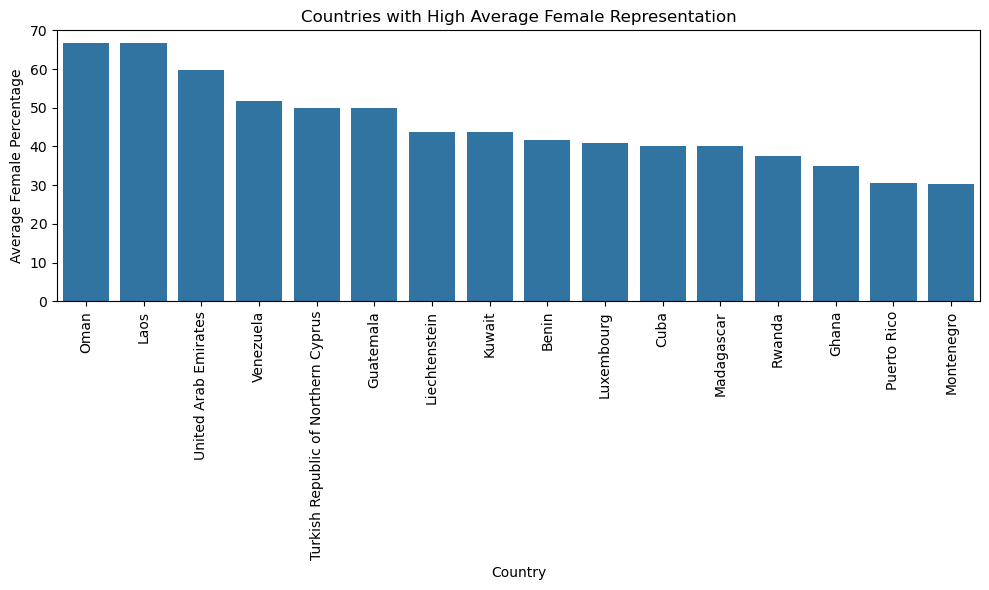

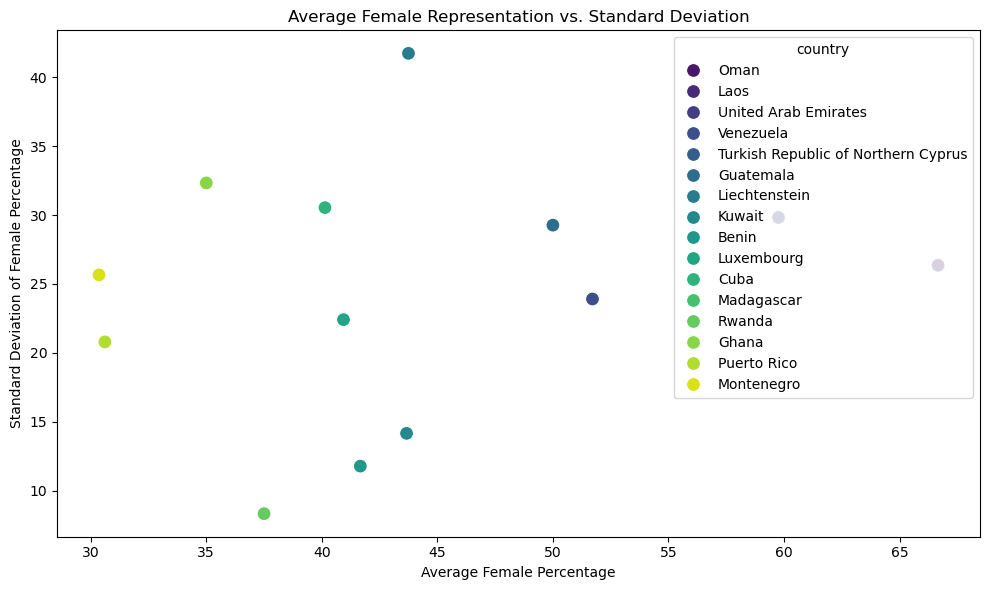

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, stddev

# Create a Spark session
spark = SparkSession.builder \
    .appName("IMO Country Data Analysis 1") \
    .getOrCreate()

# Specify HDFS URL with port
hdfs_country_path = 'hdfs://localhost:9000/user/kavyasikka1/data/country_results_df.csv'

# Load the data from HDFS
country_data = spark.read.csv(hdfs_country_path, header=True, inferSchema=True)

# Calculate the percentage of female participants
country_data = country_data.withColumn('female_percentage', (col('team_size_female') / col('team_size_all')) * 100)

# Calculate the average female representation and its standard deviation
female_consistency = country_data.groupBy("country").agg(
    avg("female_percentage").alias("avg_female_percentage"),
    stddev("female_percentage").alias("stddev_female_percentage")
)

# Filter for countries with high average female representation and low variation
consistent_countries = female_consistency.filter(col("avg_female_percentage") > 30) \
    .orderBy(col("avg_female_percentage").desc())

# Convert PySpark DataFrame to Pandas for plotting
consistent_countries_pd = consistent_countries.toPandas()

# Bar Plot: Countries with the highest average female representation
plt.figure(figsize=(10, 6))
sns.barplot(data=consistent_countries_pd, x="country", y="avg_female_percentage")
plt.xticks(rotation=90)
plt.title('Countries with High Average Female Representation')
plt.xlabel('Country')
plt.ylabel('Average Female Percentage')
plt.tight_layout()
plt.show()

# Scatter Plot: Average Female Representation vs Standard Deviation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=consistent_countries_pd, x="avg_female_percentage", y="stddev_female_percentage", hue="country", palette='viridis', s=100)
plt.title('Average Female Representation vs. Standard Deviation')
plt.xlabel('Average Female Percentage')
plt.ylabel('Standard Deviation of Female Percentage')
plt.tight_layout()
plt.show()

# Stop the Spark session when done
spark.stop()


In [15]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("IMO Individual Data Analysis 1") \
    .getOrCreate()

# Load the dataset from HDFS
hdfs_individual_path = 'hdfs://localhost:9000/user/kavyasikka1/data/individual_results_df.csv'
individual_data = spark.read.csv(hdfs_individual_path, header=True, inferSchema=True)

# Show a sample of the raw data to inspect the 'award' column
print("Sample Data from Individual Data:")
individual_data.show(10)

# Show unique values in the award column to diagnose the issue
print("Unique values in the 'award' column:")
individual_data.select("award").distinct().show()


Sample Data from Individual Data:
+----+--------------------+--------------------+---+---+---+---+---+---+---+-----+---------------+----------+
|year|          contestant|             country| p1| p2| p3| p4| p5| p6| p7|total|individual_rank|     award|
+----+--------------------+--------------------+---+---+---+---+---+---+---+-----+---------------+----------+
|2024|          Haojia Shi|People's Republic...|  7|  7|  7|  7|  7|  7| NA|   42|              1|Gold medal|
|2024|    Ivan Chasovskikh|                 C21|  7|  7|  6|  6|  7|  7| NA|   40|              2|Gold medal|
|2024|      Alexander Wang|United States of ...|  7|  7|  3|  7|  7|  7| NA|   38|              3|Gold medal|
|2024|        Satoshi Kano|               Japan|  7|  7|  2|  7|  7|  7| NA|   37|              4|Gold medal|
|2024|  László Bence Simon|             Hungary|  7|  7|  7|  7|  7|  0| NA|   35|              5|Gold medal|
|2024|Adhitya Mangudy V...|               India|  7|  7|  4|  7|  7|  3| NA|   35|    

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, trim, regexp_replace

# Create a Spark session
spark = SparkSession.builder \
    .appName("IMO Individual Data Analysis 1") \
    .getOrCreate()

# Load the dataset from HDFS
hdfs_individual_path = 'hdfs://localhost:9000/user/kavyasikka1/data/individual_results_df.csv'
individual_data = spark.read.csv(hdfs_individual_path, header=True, inferSchema=True)

# Display a sample of the data
print("Sample Data from Individual Data:")
individual_data.show(10)

# Clean up the 'award' column: Trim spaces and remove special characters
individual_data = individual_data.withColumn(
    'award',
    regexp_replace(trim(individual_data['award']), '§', '')  # Remove the special character
)

# Create a label for medal types, handling blank or whitespace awards
individual_data = individual_data.withColumn('medal_label', 
    when(trim(individual_data['award']) == 'Gold medal', 3)
    .when(trim(individual_data['award']) == 'Silver medal', 2)
    .when(trim(individual_data['award']) == 'Bronze medal', 1)
    .when(trim(individual_data['award']) == 'Honourable mention', 0)
    .otherwise(None)  # Assign None to invalid/blank awards
)

# Filter out rows with None in medal_label
individual_data = individual_data.filter(individual_data['medal_label'].isNotNull())

# Check the resulting DataFrame after filtering
print("DataFrame after filtering:")
individual_data.show()

# Show unique values in the award column to diagnose the issue
print("Unique values in the 'award' column after cleaning:")
individual_data.select("award").distinct().show()


Sample Data from Individual Data:
+----+--------------------+--------------------+---+---+---+---+---+---+---+-----+---------------+----------+
|year|          contestant|             country| p1| p2| p3| p4| p5| p6| p7|total|individual_rank|     award|
+----+--------------------+--------------------+---+---+---+---+---+---+---+-----+---------------+----------+
|2024|          Haojia Shi|People's Republic...|  7|  7|  7|  7|  7|  7| NA|   42|              1|Gold medal|
|2024|    Ivan Chasovskikh|                 C21|  7|  7|  6|  6|  7|  7| NA|   40|              2|Gold medal|
|2024|      Alexander Wang|United States of ...|  7|  7|  3|  7|  7|  7| NA|   38|              3|Gold medal|
|2024|        Satoshi Kano|               Japan|  7|  7|  2|  7|  7|  7| NA|   37|              4|Gold medal|
|2024|  László Bence Simon|             Hungary|  7|  7|  7|  7|  7|  0| NA|   35|              5|Gold medal|
|2024|Adhitya Mangudy V...|               India|  7|  7|  4|  7|  7|  3| NA|   35|    

In [17]:
from pyspark.ml.feature import VectorAssembler, PCA

# Assemble the 'total' feature into a feature vector
assembler = VectorAssembler(inputCols=['total'], outputCol='features')
individual_data = assembler.transform(individual_data)

# Apply PCA to reduce dimensions
pca = PCA(k=1, inputCol='features', outputCol='pca_features')  # You can change k to the number of principal components you want
pca_model = pca.fit(individual_data)

# Transform the dataset using PCA
pca_result = pca_model.transform(individual_data)

# Show the PCA results along with the original total and medal label
pca_result.select('total', 'medal_label', 'pca_features').show()

# Optionally, display how much variance is explained by the principal component
explained_variance = pca_model.explainedVariance
print(f"Explained Variance: {explained_variance}")



+-----+-----------+------------+
|total|medal_label|pca_features|
+-----+-----------+------------+
|   42|          3|      [42.0]|
|   40|          3|      [40.0]|
|   38|          3|      [38.0]|
|   37|          3|      [37.0]|
|   35|          3|      [35.0]|
|   35|          3|      [35.0]|
|   35|          3|      [35.0]|
|   35|          3|      [35.0]|
|   35|          3|      [35.0]|
|   35|          3|      [35.0]|
|   34|          3|      [34.0]|
|   34|          3|      [34.0]|
|   33|          3|      [33.0]|
|   32|          3|      [32.0]|
|   32|          3|      [32.0]|
|   32|          3|      [32.0]|
|   32|          3|      [32.0]|
|   32|          3|      [32.0]|
|   31|          3|      [31.0]|
|   31|          3|      [31.0]|
+-----+-----------+------------+
only showing top 20 rows

Explained Variance: [1.0]


In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, trim, regexp_replace
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Create or get the Spark session
spark = SparkSession.builder \
    .appName("IMO Individual Data Analysis 1") \
    .getOrCreate()

# Load the dataset from HDFS
hdfs_individual_path = 'hdfs://localhost:9000/user/kavyasikka1/data/individual_results_df.csv'
individual_data = spark.read.csv(hdfs_individual_path, header=True, inferSchema=True)

# Clean the award column and create medal labels (as per previous steps)
individual_data = individual_data.withColumn(
    'award',
    regexp_replace(trim(individual_data['award']), '§', '')  # Remove the special character
)

individual_data = individual_data.withColumn('medal_label', 
    when(trim(individual_data['award']) == 'Gold medal', 3)
    .when(trim(individual_data['award']) == 'Silver medal', 2)
    .when(trim(individual_data['award']) == 'Bronze medal', 1)
    .when(trim(individual_data['award']) == 'Honourable mention', 0)
    .otherwise(None)
)

individual_data = individual_data.filter(individual_data['medal_label'].isNotNull())

# Assemble the feature vector
assembler = VectorAssembler(inputCols=['total'], outputCol='features')
individual_data = assembler.transform(individual_data)

# Split the data into training and test sets
train_data, test_data = individual_data.randomSplit([0.8, 0.2], seed=42)

# Initialize the Logistic Regression model
lr = LogisticRegression(featuresCol='features', labelCol='medal_label')

# Set up the parameter grid for cross-validation
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 0.5]) \
    .build()

# Set up the CrossValidator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=param_grid,
                          evaluator=MulticlassClassificationEvaluator(labelCol='medal_label', predictionCol='prediction', metricName='accuracy'),
                          numFolds=3)

# Run cross-validation and choose the best model
cv_model = crossval.fit(train_data)

# Make predictions on the test set
predictions = cv_model.transform(test_data)

# Evaluate the accuracy of the model
evaluator = MulticlassClassificationEvaluator(labelCol='medal_label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)

print(f"Accuracy: {accuracy}")

# Show predictions alongside actual labels
predictions.select('total', 'medal_label', 'prediction').show()

# Stop the Spark session when done
spark.stop()


Accuracy: 0.712285614280714
+-----+-----------+----------+
|total|medal_label|prediction|
+-----+-----------+----------+
|   40|          3|       3.0|
|   31|          0|       2.0|
|   35|          1|       3.0|
|   28|          0|       2.0|
|   35|          1|       3.0|
|   41|          3|       3.0|
|   29|          0|       2.0|
|   32|          0|       2.0|
|   26|          0|       2.0|
|   27|          0|       2.0|
|   28|          0|       2.0|
|   24|          0|       1.0|
|   28|          0|       2.0|
|   36|          2|       3.0|
|   39|          3|       3.0|
|   30|          1|       2.0|
|   38|          2|       3.0|
|   41|          3|       3.0|
|   27|          1|       2.0|
|   23|          1|       1.0|
+-----+-----------+----------+
only showing top 20 rows



In [31]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, trim, regexp_replace, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Create or get the Spark session and set logging level to ERROR
spark = SparkSession.builder \
    .appName("IMO Random Forest Analysis") \
    .getOrCreate()

# Set the logging level to ERROR to suppress warnings
spark.sparkContext.setLogLevel("ERROR")

# Load the dataset from HDFS
hdfs_individual_path = 'hdfs://localhost:9000/user/kavyasikka1/data/individual_results_df.csv'
individual_data = spark.read.csv(hdfs_individual_path, header=True, inferSchema=True)

# Clean the 'award' column: Trim spaces and remove special characters
individual_data = individual_data.withColumn(
    'award',
    regexp_replace(trim(individual_data['award']), '§', '')  # Remove the special character
)

# Create a label for medal types, handling blank or whitespace awards
individual_data = individual_data.withColumn('medal_label', 
    when(trim(individual_data['award']) == 'Gold medal', 3)
    .when(trim(individual_data['award']) == 'Silver medal', 2)
    .when(trim(individual_data['award']) == 'Bronze medal', 1)
    .when(trim(individual_data['award']) == 'Honourable mention', 0)
    .otherwise(None)  # Assign None to invalid/blank awards
)

# Filter out rows with None in medal_label
individual_data = individual_data.filter(individual_data['medal_label'].isNotNull())

# Convert p1 to p6 columns to numeric types
for col_name in ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']:
    individual_data = individual_data.withColumn(col_name, col(col_name).cast('double'))

# Check for null values in the columns to be assembled
null_counts = individual_data.select([when(col(c).isNull(), c).alias(c) for c in ['total', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]).summary()
print("Null counts in relevant columns:")
null_counts.show()

# Filter out any rows with null values in the relevant columns
individual_data = individual_data.dropna(subset=['total', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6'])

# Assemble the feature vector using total and scores from p1 to p6
assembler = VectorAssembler(inputCols=['total', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6'], outputCol='features')
individual_data = assembler.transform(individual_data)

# Split the data into training and test sets
train_data, test_data = individual_data.randomSplit([0.8, 0.2], seed=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(featuresCol='features', labelCol='medal_label')

# Set up the parameter grid for cross-validation
param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .addGrid(rf.minInstancesPerNode, [1, 2]) \
    .build()

# Set up the CrossValidator
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=param_grid,
                          evaluator=MulticlassClassificationEvaluator(labelCol='medal_label', predictionCol='prediction', metricName='accuracy'),
                          numFolds=5)  # Increased number of folds

# Log the beginning of the model training process
print("Starting cross-validation and model training...")

# Run cross-validation and choose the best model
cv_model = crossval.fit(train_data)

# Log the completion of the model training process
print("Model training complete.")

# Make predictions on the test set
predictions = cv_model.transform(test_data)

# Evaluate the accuracy of the model
evaluator = MulticlassClassificationEvaluator(labelCol='medal_label', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)

# Log the accuracy of the model
print(f"Accuracy of Random Forest model: {accuracy}")

# Confusion Matrix
confusion_matrix = predictions.groupBy("medal_label", "prediction").count()
print("Confusion Matrix:")
confusion_matrix.show()

# Additional metrics
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"F1 Score: {f1_score}")

# Show predictions alongside actual labels
predictions.select('total', 'medal_label', 'prediction').show()

# Stop the Spark session when done
spark.stop()


Null counts in relevant columns:


+-------+-----+----+----+----+----+----+----+
|summary|total|  p1|  p2|  p3|  p4|  p5|  p6|
+-------+-----+----+----+----+----+----+----+
|  count|    0| 533| 533| 533| 533| 533| 533|
|   mean| NULL|NULL|NULL|NULL|NULL|NULL|NULL|
| stddev| NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|    min| NULL|  p1|  p2|  p3|  p4|  p5|  p6|
|    25%| NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|    50%| NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|    75%| NULL|NULL|NULL|NULL|NULL|NULL|NULL|
|    max| NULL|  p1|  p2|  p3|  p4|  p5|  p6|
+-------+-----+----+----+----+----+----+----+

Starting cross-validation and model training...


Model training complete.
Accuracy of Random Forest model: 0.7819303338171263
Confusion Matrix:


+-----------+----------+-----+
|medal_label|prediction|count|
+-----------+----------+-----+
|          2|       1.0|  120|
|          1|       0.0|   70|
|          0|       2.0|    1|
|          1|       3.0|    1|
|          3|       1.0|    3|
|          0|       0.0|  628|
|          1|       2.0|  155|
|          2|       3.0|   53|
|          3|       2.0|   94|
|          3|       3.0|  239|
|          2|       2.0|  504|
|          1|       1.0|  784|
|          0|       1.0|  104|
+-----------+----------+-----+

Weighted Precision: 0.7871263029092406
Weighted Recall: 0.7819303338171263
F1 Score: 0.7834510512758353
+-----+-----------+----------+
|total|medal_label|prediction|
+-----+-----------+----------+
|   29|          0|       1.0|
|   40|          3|       3.0|
|   32|          1|       2.0|
|   33|          1|       2.0|
|   26|          1|       1.0|
|   30|          1|       2.0|
|   38|          3|       3.0|
|   24|          1|       1.0|
|   28|          1|       2

## Conclusion

The project aimed to analyze data from the International Mathematical Olympiad (IMO) to answer two key questions: identifying countries with the highest female representation in their teams and predicting the medal a participant can win based on their total score.

For the **female representation analysis**, countries with a high average percentage of female participants and consistent representation were identified. This analysis sheds light on the gender distribution in the IMO and highlights countries with better female representation over the years.

For the **medal prediction task**, a **Random Forest** classifier was used to predict the type of medal (Gold, Silver, Bronze, or Honourable Mention) based on a participant's total score. The model achieved the following results:

- **Accuracy**: 0.7819 (approximately 78.19%)
- **Weighted Precision**: 0.7871
- **Weighted Recall**: 0.7819
- **F1 Score**: 0.7835

The confusion matrix reveals that the model generally performs well in predicting medals, although some misclassifications occur, especially between Silver and Bronze medals. This could be due to the overlap in total scores between different medal types.

While the model achieves reasonable accuracy, further improvements could be made by exploring additional features or tuning the model further. Despite this, the Random Forest model provides a solid baseline for predicting IMO medals based on total scores, and the analysis offers useful insights into gender representation and performance trends in the IMO.
